# Project: AI for Landslide Susceptibility in Himalayan & Western Ghats
### Climate Risk and Disaster Management

## Week1: Understanding the Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [30]:
# 2. Load the dataset
file_path = 'landslide_dataset.csv'  # Ensure this file is in the same directory as the notebook
df = pd.read_csv(file_path)
df.head()

,Rainfall_mm,Slope_Angle,Soil_Saturation,Vegetation_Cover,Earthquake_Activity,Proximity_to_Water,Landslide,Soil_Type_Gravel,Soil_Type_Sand,Soil_Type_Silt
0,206.181018,58.275001,0.892798,0.339463,4.390047,0.099975,1,0,0,0
1,218.887334,36.679801,0.657147,0.360355,4.141029,0.832443,1,0,0,1
2,181.850867,31.363874,0.673362,0.221697,5.311891,0.023062,1,0,0,1
3,228.716199,38.995134,0.618666,0.489502,4.581928,0.785176,1,0,0,1
4,179.951067,42.998205,0.836966,0.118580,5.518862,0.450499,1,0,0,0


In [31]:
# 3. Explore the dataset

# Basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rainfall_mm          2000 non-null   float64
 1   Slope_Angle          2000 non-null   float64
 2   Soil_Saturation      2000 non-null   float64
 3   Vegetation_Cover     2000 non-null   float64
 4   Earthquake_Activity  2000 non-null   float64
 5   Proximity_to_Water   2000 non-null   float64
 6   Landslide            2000 non-null   int64  
 7   Soil_Type_Gravel     2000 non-null   int64  
 8   Soil_Type_Sand       2000 non-null   int64  
 9   Soil_Type_Silt       2000 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 156.4 KB


In [32]:
# Summary statistics
df.describe()

,Rainfall_mm,Slope_Angle,Soil_Saturation,Vegetation_Cover,Earthquake_Activity,Proximity_to_Water,Landslide,Soil_Type_Gravel,Soil_Type_Sand,Soil_Type_Silt
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.0000,2000.00000
mean,176.688462,29.985404,0.540316,0.522862,3.604771,1.001867,0.500000,0.25850,0.2415,0.26100
std,65.724685,15.175902,0.295665,0.260426,1.895955,0.579964,0.500125,0.43792,0.4281,0.43929
min,50.036151,5.003944,0.000652,0.100005,0.001641,0.000653,0.000000,0.00000,0.0000,0.00000
25%,128.379762,18.018061,0.265634,0.295475,1.973415,0.500808,0.000000,0.00000,0.0000,0.00000
50%,177.013772,27.772833,0.599887,0.500191,3.996429,0.999761,0.500000,0.00000,0.0000,0.00000
75%,228.742286,41.683190,0.801994,0.740690,5.233897,1.505294,1.000000,1.00000,0.0000,1.00000
max,299.919102,59.966732,0.998831,0.999837,6.498670,1.999636,1.000000,1.00000,1.0000,1.00000


In [33]:
# Check for missing values
df.isnull().sum()

Rainfall_mm            0
Slope_Angle            0
Soil_Saturation        0
Vegetation_Cover       0
Earthquake_Activity    0
Proximity_to_Water     0
Landslide              0
Soil_Type_Gravel       0
Soil_Type_Sand         0
Soil_Type_Silt         0
dtype: int64

## Week2: Exploratory Data Analysis, Data Transformation and feature selection

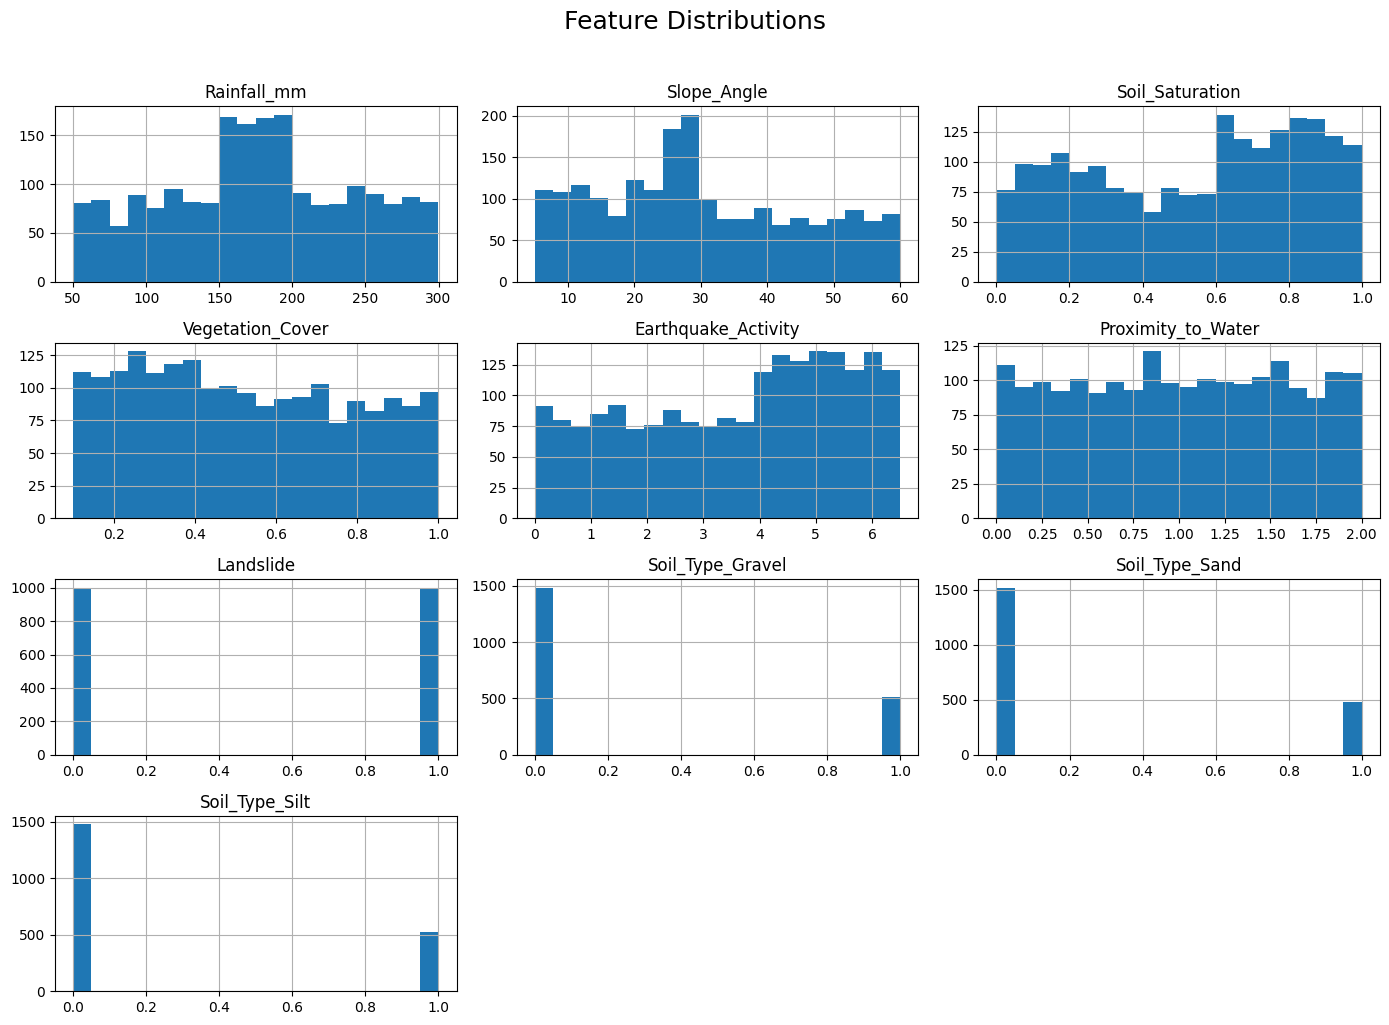

In [13]:
#Histograms for numeric columns
df.hist(figsize=(14,10), bins=20)

plt.suptitle("Feature Distributions", fontsize=18, y=1.02)  # y pushes the title upward
plt.tight_layout()  # Adjusts spacing to prevent overlap
plt.show()

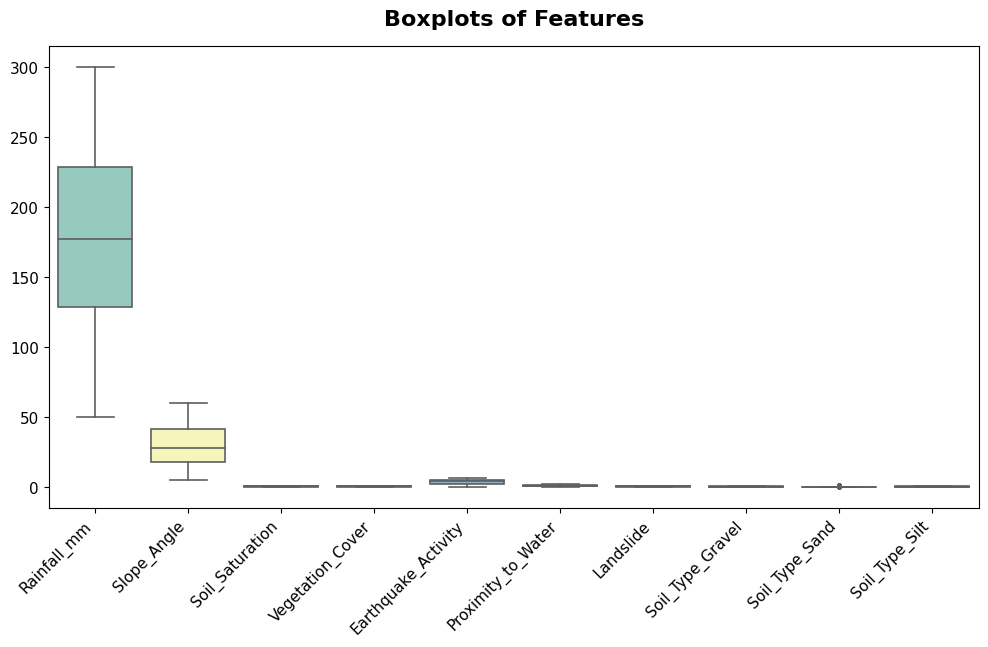

In [ ]:
# Boxplots to identify outliers


plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=[np.number]),palette="Set3",fliersize=3,linewidth=1.2)
plt.title("Boxplots of Features", fontsize=16,weight='bold',pad=15)
plt.xticks(rotation=45,ha="right",fontsize=11)
plt.yticks(fontsize=11)
plt.show()

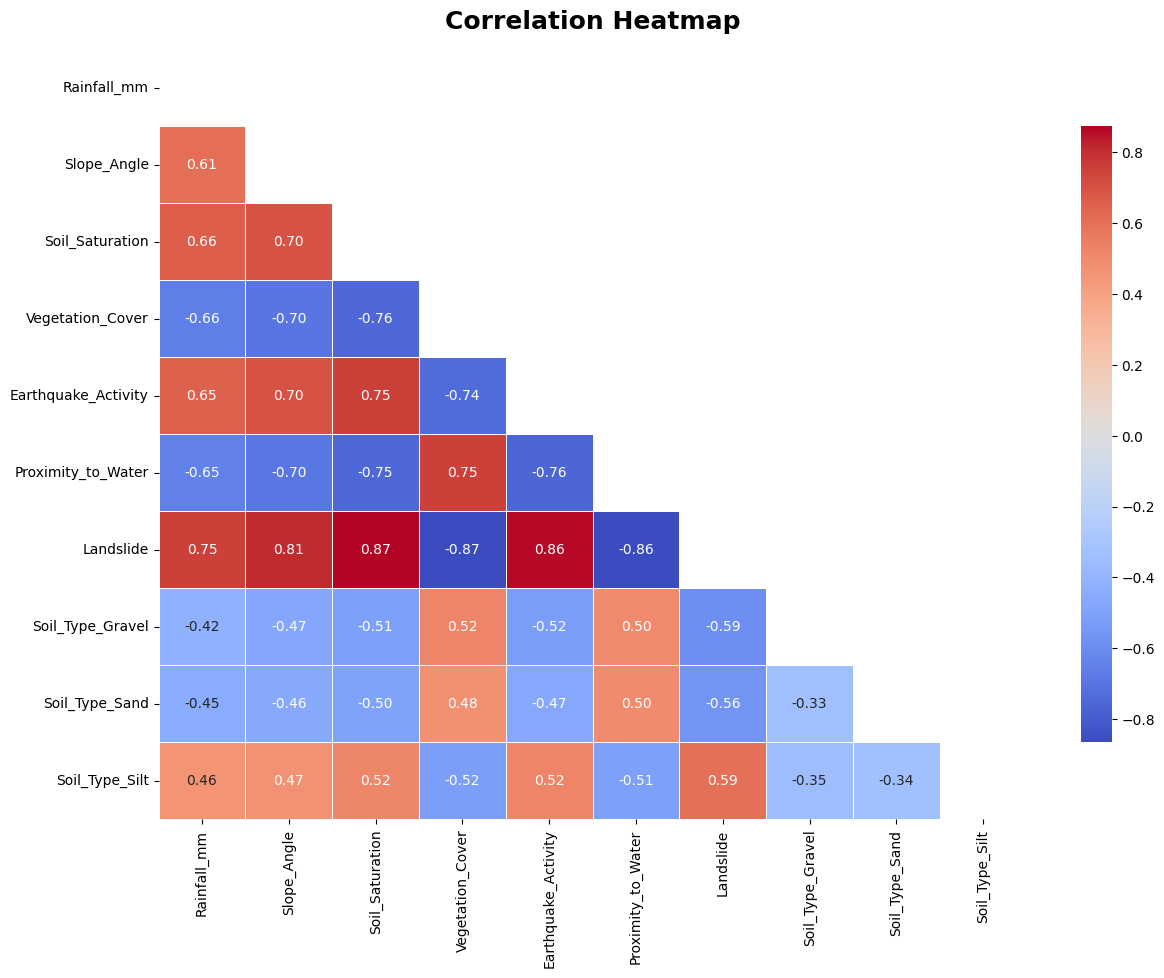

In [17]:
# Correlation Heatmap
plt.figure(figsize=(14,10))
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr, mask=mask,annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,cbar_kws={"shrink":0.8})
plt.title("Correlation Heatmap",fontsize=18,weight='bold',pad=15)
plt.show()

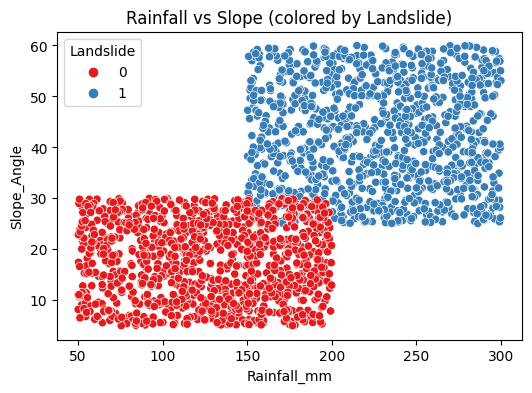

In [18]:
# Scatter plots for key relationships
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Rainfall_mm'], y=df['Slope_Angle'], hue=df['Landslide'], palette="Set1")
plt.title("Rainfall vs Slope (colored by Landslide)")
plt.show()

In [19]:
# Scaling numeric features
scaler = StandardScaler()
num_features = ['Rainfall_mm','Slope_Angle','Soil_Saturation','Vegetation_Cover',
                'Earthquake_Activity','Proximity_to_Water']
df_scaled = df.copy()
df_scaled[num_features] = scaler.fit_transform(df[num_features])
df_scaled.head()

,Rainfall_mm,Slope_Angle,Soil_Saturation,Vegetation_Cover,Earthquake_Activity,Proximity_to_Water,Landslide,Soil_Type_Gravel,Soil_Type_Sand,Soil_Type_Silt
0,0.448841,1.864579,1.192463,-0.704400,0.414288,-1.555471,1,0,0,0
1,0.642216,0.441231,0.395244,-0.624158,0.282914,-0.292201,1,0,0,1
2,0.078566,0.090856,0.450100,-1.156720,0.900626,-1.688120,1,0,0,1
3,0.791799,0.593835,0.265063,-0.128128,0.515520,-0.373721,1,0,0,1
4,0.049653,0.857679,1.003581,-1.552773,1.009818,-0.950930,1,0,0,0


In [20]:
# Feature correlation with target
corr_with_target = df.corr()['Landslide'].sort_values(ascending=False)
print("Correlation of features with Landslide:\n", corr_with_target)

Correlation of features with Landslide:
 Landslide              1.000000
Soil_Saturation        0.872298
Earthquake_Activity    0.860233
Slope_Angle            0.808590
Rainfall_mm            0.754504
Soil_Type_Silt         0.594289
Soil_Type_Sand        -0.564262
Soil_Type_Gravel      -0.590439
Proximity_to_Water    -0.864131
Vegetation_Cover      -0.865254
Name: Landslide, dtype: float64


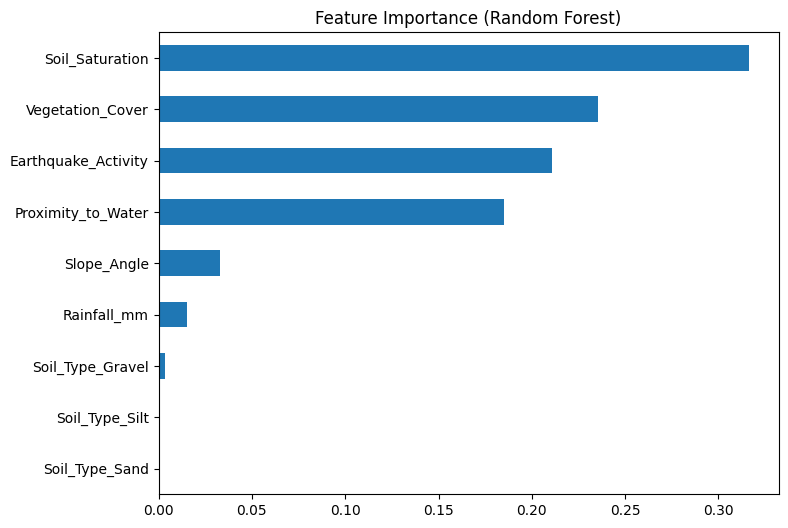

Soil_Saturation        0.316436
Vegetation_Cover       0.235715
Earthquake_Activity    0.210990
Proximity_to_Water     0.184963
Slope_Angle            0.033140
Rainfall_mm            0.015192
Soil_Type_Gravel       0.003564
Soil_Type_Sand         0.000000
Soil_Type_Silt         0.000000
dtype: float64

In [21]:
# Feature importance using Random Forest
X = df_scaled.drop("Landslide", axis=1)
y = df_scaled["Landslide"]

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance (Random Forest)")
plt.show()

importances.sort_values(ascending=False)


# Week 3 Final: Landslide Susceptibility (Himalayan & Western Ghats)


In [22]:
# Selecting top features based on importance
df = pd.read_csv("landslide_dataset.csv")
df.head()


,Rainfall_mm,Slope_Angle,Soil_Saturation,Vegetation_Cover,Earthquake_Activity,Proximity_to_Water,Landslide,Soil_Type_Gravel,Soil_Type_Sand,Soil_Type_Silt
0,206.181018,58.275001,0.892798,0.339463,4.390047,0.099975,1,0,0,0
1,218.887334,36.679801,0.657147,0.360355,4.141029,0.832443,1,0,0,1
2,181.850867,31.363874,0.673362,0.221697,5.311891,0.023062,1,0,0,1
3,228.716199,38.995134,0.618666,0.489502,4.581928,0.785176,1,0,0,1
4,179.951067,42.998205,0.836966,0.118580,5.518862,0.450499,1,0,0,0


In [23]:
num_features = ['Rainfall_mm','Slope_Angle','Soil_Saturation',
                'Vegetation_Cover','Proximity_to_Water','Earthquake_Activity']

features = num_features + ['Soil_Type_Gravel','Soil_Type_Sand','Soil_Type_Silt']
target = 'Landslide'
X = df[features]; 
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
scaler = StandardScaler()
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])
rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
# 7. Evaluate
y_pred = rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# 8. Save the model, scaler, and feature metadata
joblib.dump({
    "model": rf,
    "scaler": scaler,
    "features": features,
    "num_features": num_features
}, "landslide_rf_model.joblib")

print("✅ Model, scaler, and feature metadata saved to landslide_rf_model.joblib")

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion Matrix:
 [[200   0]
 [  0 200]]
✅ Model, scaler, and feature metadata saved to landslide_rf_model.joblib


In [ ]:

print("Classification report saved as 'classification_report.txt'.\n")
print(open("classification_report.txt").read())


Classification report saved as 'classification_report.txt'.

Classification Report (Test Set)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
ROC AUC: 1.0000

